# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
from utils import *

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set options for displaying dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# 2. Load data & Basic information

In [3]:
app_train = load_data('dseb63_application_train.csv',
                      index_col=0,
                      verbose=2)

Table: dseb63_application_train.csv
Shape: (246009, 122)

Number of categorical variables: 16
Number of numerical variables: 106

Number of unique values of SK_ID_CURR: 246009

Number of duplicate values: 0


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,278621
1,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,NaN,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,NaN,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,138348
3,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, part

In [4]:
app_test = load_data('dseb63_application_test.csv',
                     index_col=0,
                     verbose=2)

Table: dseb63_application_test.csv
Shape: (61502, 121)

Number of categorical variables: 16
Number of numerical variables: 105

Number of unique values of SK_ID_CURR: 61502

Number of duplicate values: 0


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,Cash loans,M,Y,N,2,207000.00,465457.50,52641.00,418500.00,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.01,-13297,-762,-637.00,-4307,19.00,1,1,0,1,0,0,Sales staff,4.00,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.68,0.60,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,1.00,83659
1,Cash loans,F,Y,Y,0,247500.00,1281712.50,48946.50,1179000.00,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.01,-14778,-1141,-1610.00,-4546,11.00,1,1,0,1,0,1,Managers,1.00,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.43,0.43,0.71,0.08,0.06,1.00,0.96,0.13,0.08,0.05,0.42,0.29,0.07,0.06,0.08,0.01,0.11,0.08,0.06,0.99,0.92,0.05,0.08,0.03,0.33,0.04,0.04,0.07,0.09,0.00,0.00,0.08,0.06,1.00,0.96,0.13,0.08,0.05,0.42,0.29,0.07,0.06,0.09,0.01,0.11,reg oper account,block of flats,0.08,Monolithic,No,2.00,0.00,2.00,0.00,-1071.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,3.00,174814
2,Cash loans,F,Y,N,0,202500.00,495000.00,39109.50,495000.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.04,-17907,-639,-2507.00,-1461,4.00,1,1,1,1,0,0,Sales staff,2.00,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.53,0.53,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,0.00,5.00,0.00,-1435.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,3.00,179486
3,Cash loans,F,N,Y,0,247500

In [5]:
print('Two tables have the same features:', set(app_train.drop('TARGET', axis=1).columns) == set(app_test.columns))

Two tables have the same features: True


### Observation
- The **application_train.csv** file has 246009 rows and 122 columns containing 121 features and a target column.
- The **application_test.csv** file has 61502 rows and 121 features
- Both 2 tables have:
    - Primary key: 'SK_ID_CURR'
    - Each row representing unique loan applications and defined by a unique value 'SK_ID_CURR'
    - 121 same features
- There is no overlap of SK_ID_CURR in the 2 tables
- The ratio between the training set and the test set is 80:20

# 3. Target column

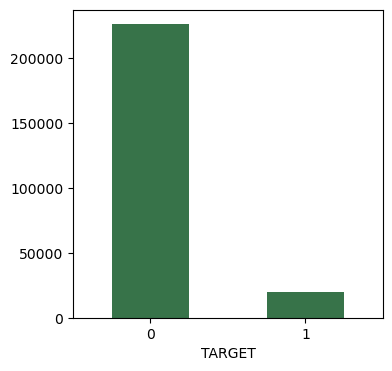

In [6]:
app_train.TARGET.value_counts().plot.bar(color='#377349', figsize=(4,4), rot=0);

### Observation: Class imbalanced problem
- Data is highly imbalanced that the proportion between class 0 and class 1 is about 92:8
- Since class 0 accounts for 98% cases, most of the loans were paid back on time
- To deal with problem imbalanced class, we can use SMOTE (Synthetic Minority Over Sampling Technique) algorithm. Instead of using copies of observations to oversample, SMOTE varies attributes of the observations to create new synthetic samples.

# 4. Missing values

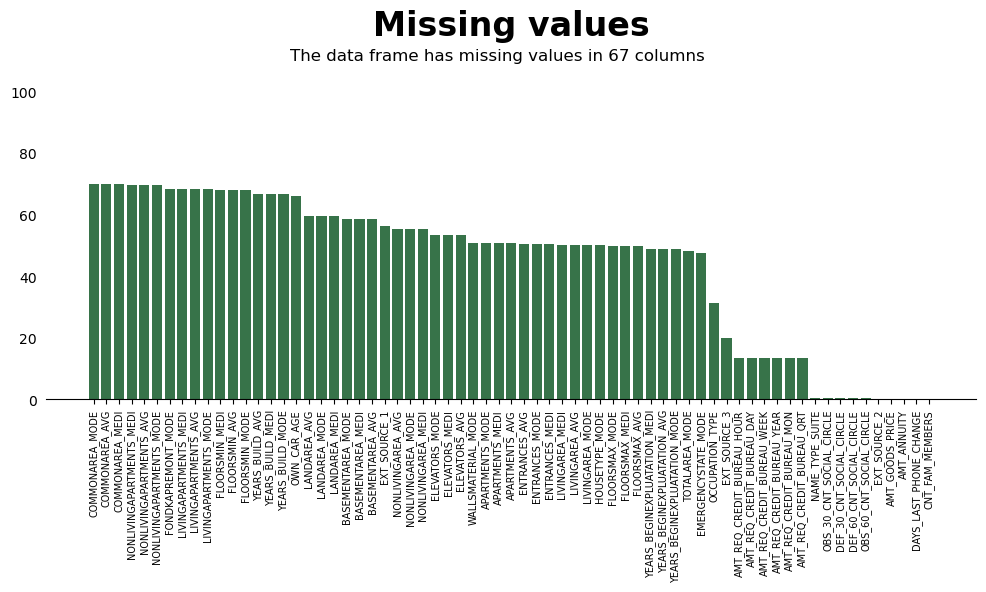

In [7]:
df_missing = create_df_missing(app_train)
plot_df_missing(df_missing, x_title=0.5, x_subtitle=15.5, show_grid=False)

### Observation
- Most of the features having more than 30% missing values except OWN_CAR_AGE, OCCUPATION_TYPE, and EXT_SOURCE_1  are normalized information about the building and their descriptions are somewhat unclear.
- For features with fewer missing values, we can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values, it is better to drop those columns as they give very less insight on analysis.

# 5. Define numeric and category features

In [8]:
df_define = pd.DataFrame({'n_unique': app_train.nunique().sort_values(),
                          'dtype': app_train.dtypes})
df_define.sort_values('n_unique', inplace=True)
print(list(df_define[df_define.dtype != object][df_define.n_unique < 4].index))

['FLAG_EMAIL', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_4', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_9', 'TARGET', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_6', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']


### Observation
- All categorical features whose dtype are int8 have less than 4 nunique

In [9]:
app_train, cate_train, num_train = validate_dtype(app_train)

# 6. Imbalanced categorical features

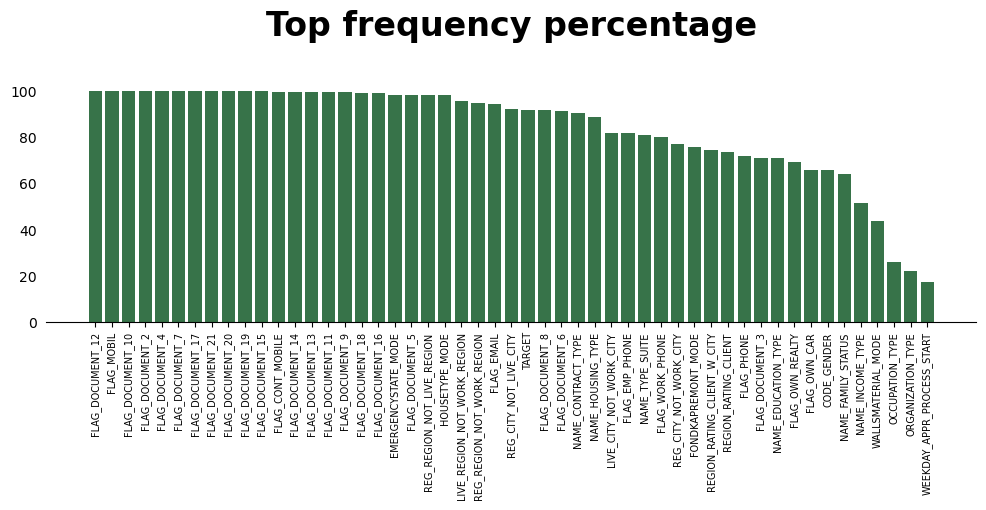

In [10]:
plot_imbalance(describe_class(cate_train), x_title=0.5, figsize=(12,3), show_grid = False )

### Observation
Many columns have high imbalanced class that the top class can account for nearly 100% frequency

# 7. Outlier

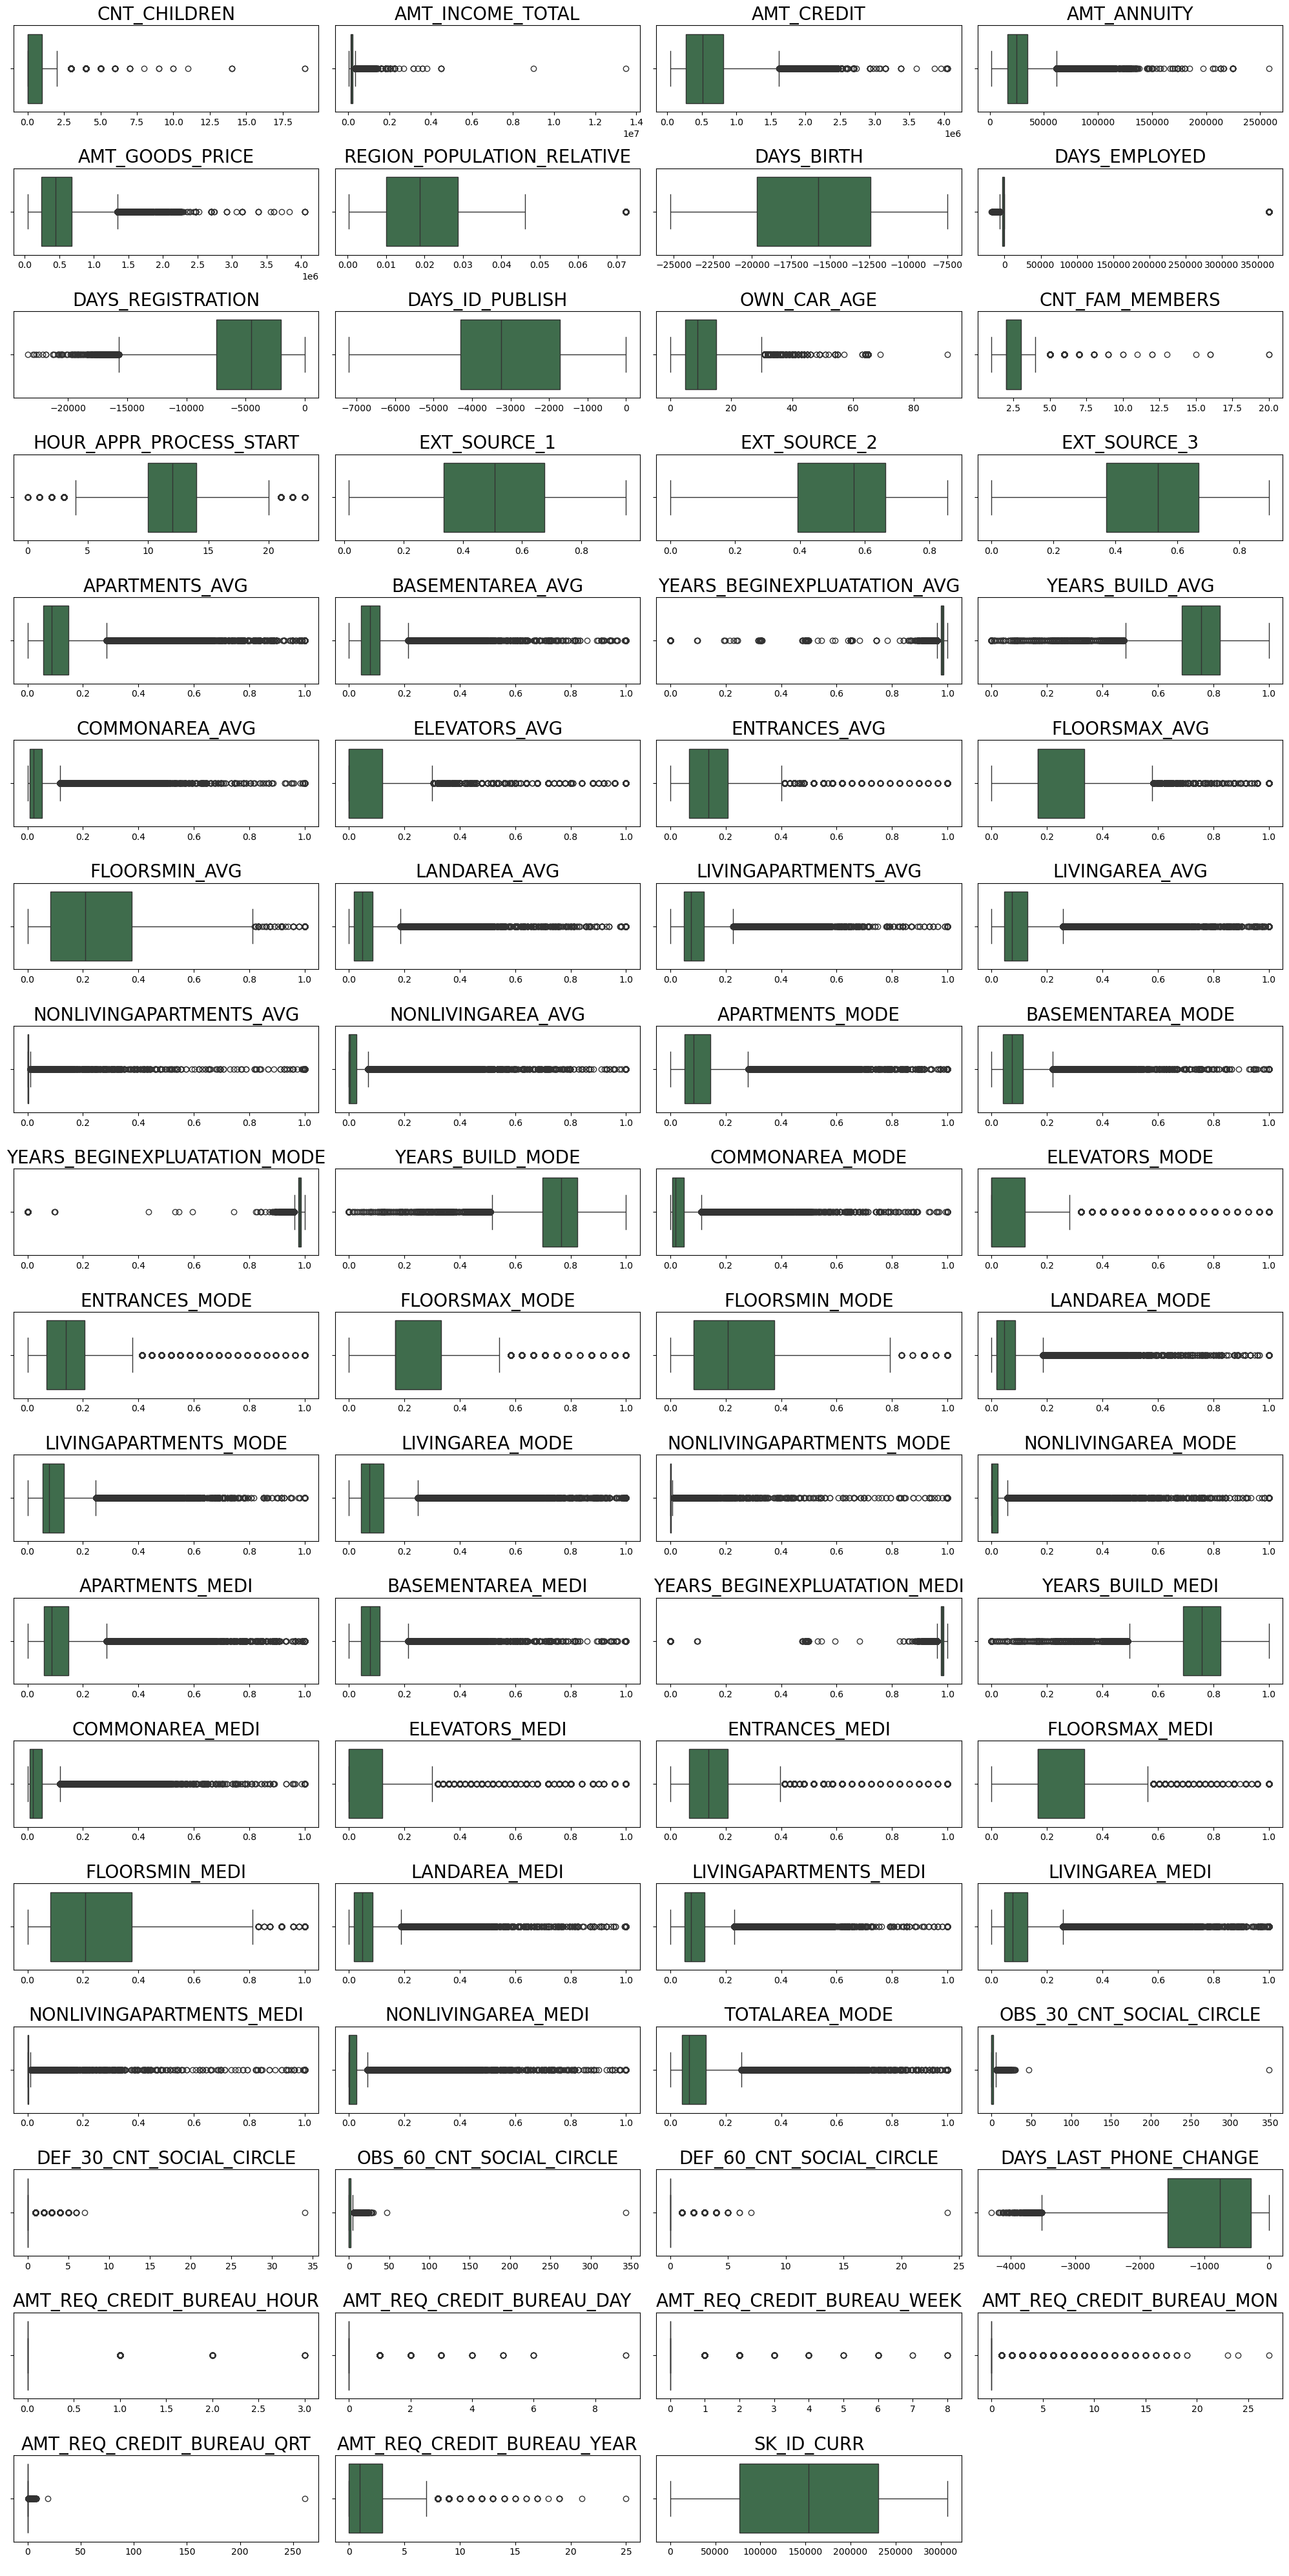

In [11]:
plot_boxplot(num_train)

### Observation
Most features have many outliers and skewed distributions

# 8. Anomalies
## 8.1 Numerical values

In [12]:
day_to_year(num_train).describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,246009.00,0.42,0.72,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,246009.00,168458.88,104529.69,25650.00,112500.00,146250.00,202500.00,13500000.00
AMT_CREDIT,246009.00,599640.99,403098.05,45000.00,270000.00,514777.50,808650.00,4050000.00
AMT_ANNUITY,245999.00,27120.24,14510.63,1615.50,16506.00,24903.00,34654.50,258025.50
AMT_GOODS_PRICE,245785.00,538982.73,370051.98,40500.00,238500.00,450000.00,679500.00,4050000.00
REGION_POPULATION_RELATIVE,246009.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
YEARS_BIRTH,246009.00,-43.94,11.96,-69.00,-54.00,-43.00,-34.00,-21.00
YEARS_EMPLOYED,246009.00,175.00,387.27,-49.00,-8.00,-3.00,-1.00,1001.00
YEARS_REGISTRATION,246009.00,-13.66,9.66,-64.00,-20.00,-12.00,-5.00,0.00
YEARS_ID_PUBLISH,246009.00,-8.20,4.15,-20.00,-12.00,-9.00,-5.00,-0.00


### Observation
The year of employment has some positive values and can be up to 1000 years. Therefore, we will check posivate value of DAYS_EMPLOYED

In [13]:
app_train[app_train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    44324
Name: count, dtype: int64

**In this case, we can define "365243" as an anomalous value and fill it with np.nan**

In [14]:
app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

## 8.2 Categorical values

In [15]:
app_train.CODE_GENDER.value_counts(dropna=False)

CODE_GENDER
F      161856
M       84150
XNA         3
Name: count, dtype: int64

### Observation
Some columns contain "XNA" value which means not available. Therefore we have to replace these values by np.nan

# 9. Correlation

In [16]:
cmat = CorrelationMatrix(app_train, drop_cols='SK_ID_CURR')

In [17]:
cmat.target_top()

,PhiK-Correlation
EXT_SOURCE_2,0.47
EXT_SOURCE_1,0.41
EXT_SOURCE_3,0.26
AMT_ANNUITY,0.19
AMT_CREDIT,0.15
AMT_GOODS_PRICE,0.12
OCCUPATION_TYPE,0.10
ORGANIZATION_TYPE,0.09
DAYS_BIRTH,0.09
REGION_POPULATION_RELATIVE,0.09


## 9.1 Numerical values

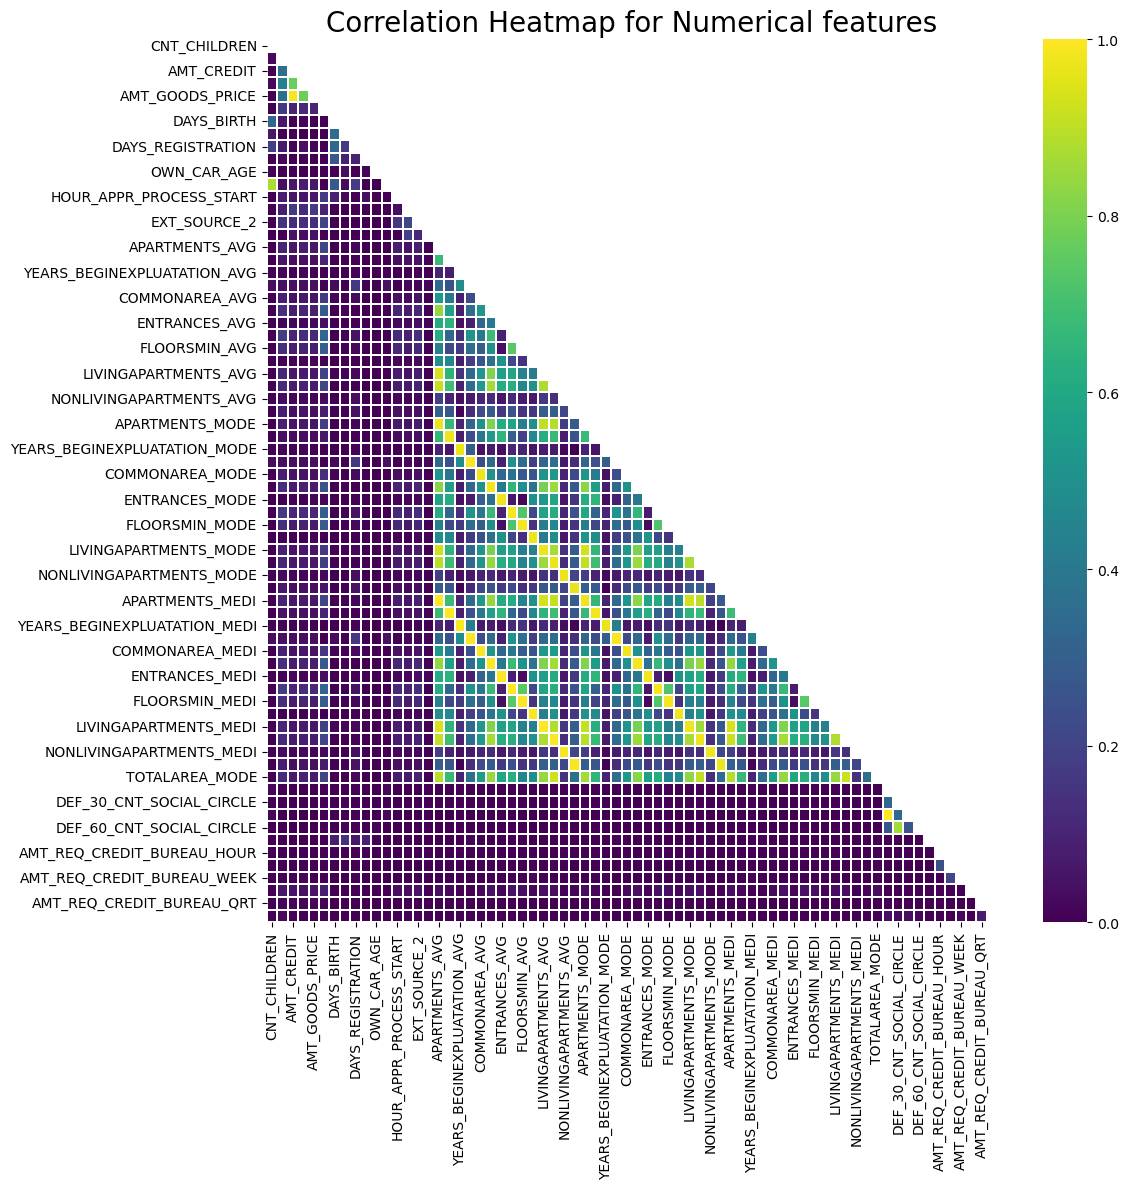

In [18]:
cmat.plot_correlation_matrix()

In [19]:
cmat.target_top_num()

,Correlation
EXT_SOURCE_3,0.18
EXT_SOURCE_2,0.16
EXT_SOURCE_1,0.15
DAYS_BIRTH,0.08
DAYS_EMPLOYED,0.07
DAYS_LAST_PHONE_CHANGE,0.05
DAYS_ID_PUBLISH,0.05
FLOORSMAX_AVG,0.04
FLOORSMAX_MEDI,0.04
FLOORSMAX_MODE,0.04


## 9.2 Categorical values

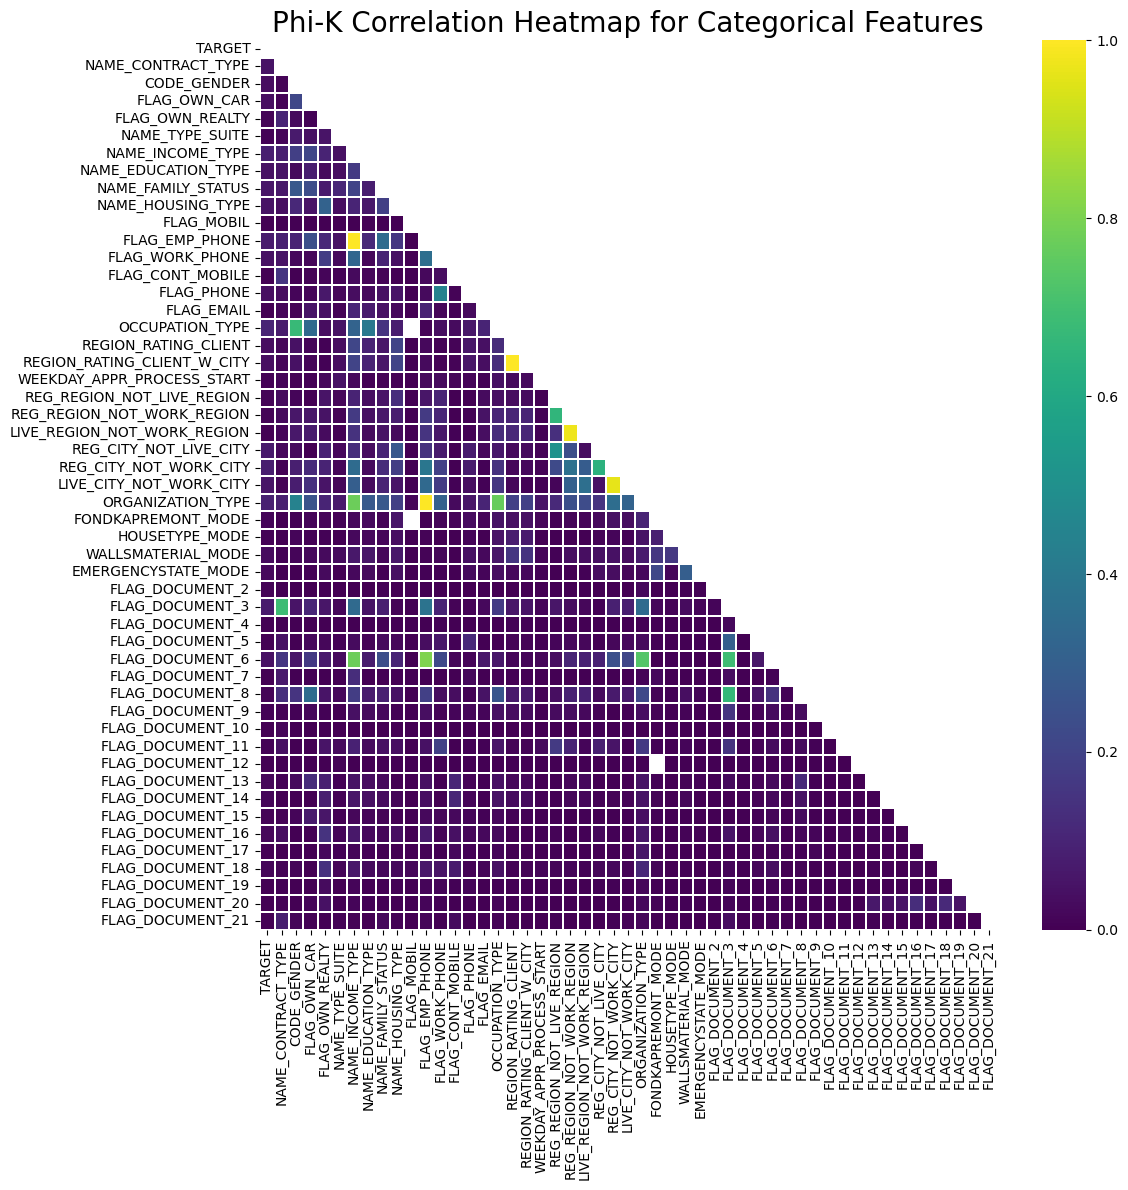

In [20]:
cmat.plot_phik_matrix()

In [21]:
cmat.target_top_cate()

,PhiK-Correlation
OCCUPATION_TYPE,0.10
ORGANIZATION_TYPE,0.09
NAME_INCOME_TYPE,0.08
REG_CITY_NOT_WORK_CITY,0.08
FLAG_EMP_PHONE,0.07
FLAG_DOCUMENT_3,0.07
REG_CITY_NOT_LIVE_CITY,0.07
NAME_FAMILY_STATUS,0.06
LIVE_CITY_NOT_WORK_CITY,0.05
NAME_CONTRACT_TYPE,0.05


### Observation
- Most of the numerical columns having high correlations to each other are about normalized information about building
- Some of the highly correlated numeric pairs/groups are
    + AMT_GOODS_PRICE and AMT_CREDIT
    + CNT_FAM_MEMBERS and CNT_CHILDREN
    + OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE
- Some of the highly correlated category pairs/groups are
    + NAME_INCOME_TYPE, ORGANIZATION_TYPE and FLAG_EMP_PHONE
    + REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT
    + LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION
    + LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY
- EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 are features highly correlated with TARGET column. These might be important for our classification task.

# 10. Categorical analysis

## 10.1 OCCUPATION_TYPE

Total Number of unique categories of OCCUPATION_TYPE = 19


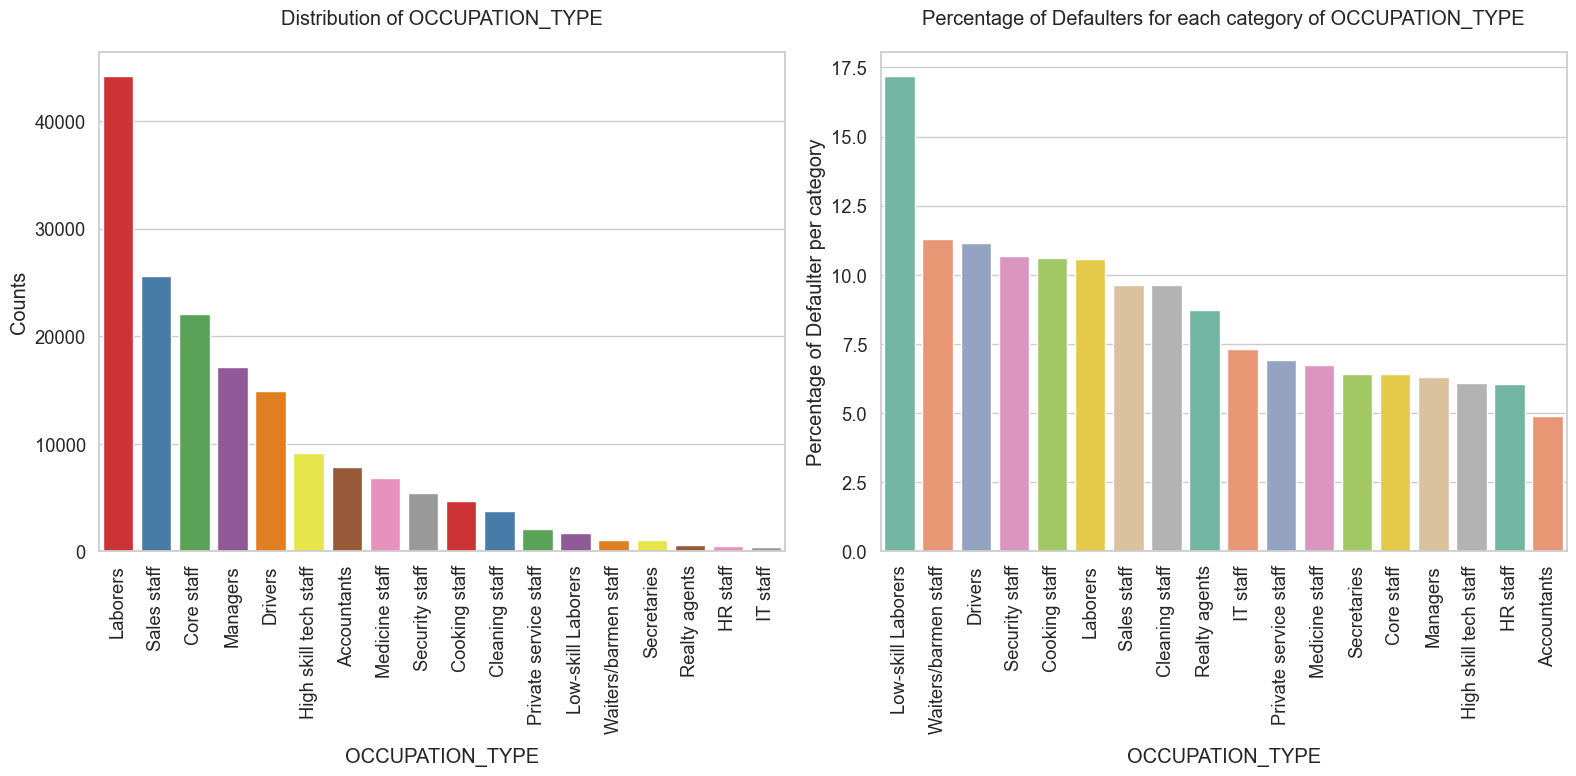

In [22]:
plot_categorical_variables_bar(app_train, 'OCCUPATION_TYPE')

### Observation
- The Defaulting Rate for Low-Skill Laborers is the highest among all the occupation types (about 17.5%) and it is followed by Drivers, Waiters, Security Staff, Laborers, Cooking Staff, etc. All the jobs are low-level jobs.
- The lowest defaulting tate are among Accountants, Core Staff, Managers, High skilled tech staff, HR staff, etc. which are from medium to high level jobs.

This shows that low-level jobs people tend to have a higher default rate.

## 9.2 ORGANIZATION_TYPE

Total Number of unique categories of ORGANIZATION_TYPE = 58


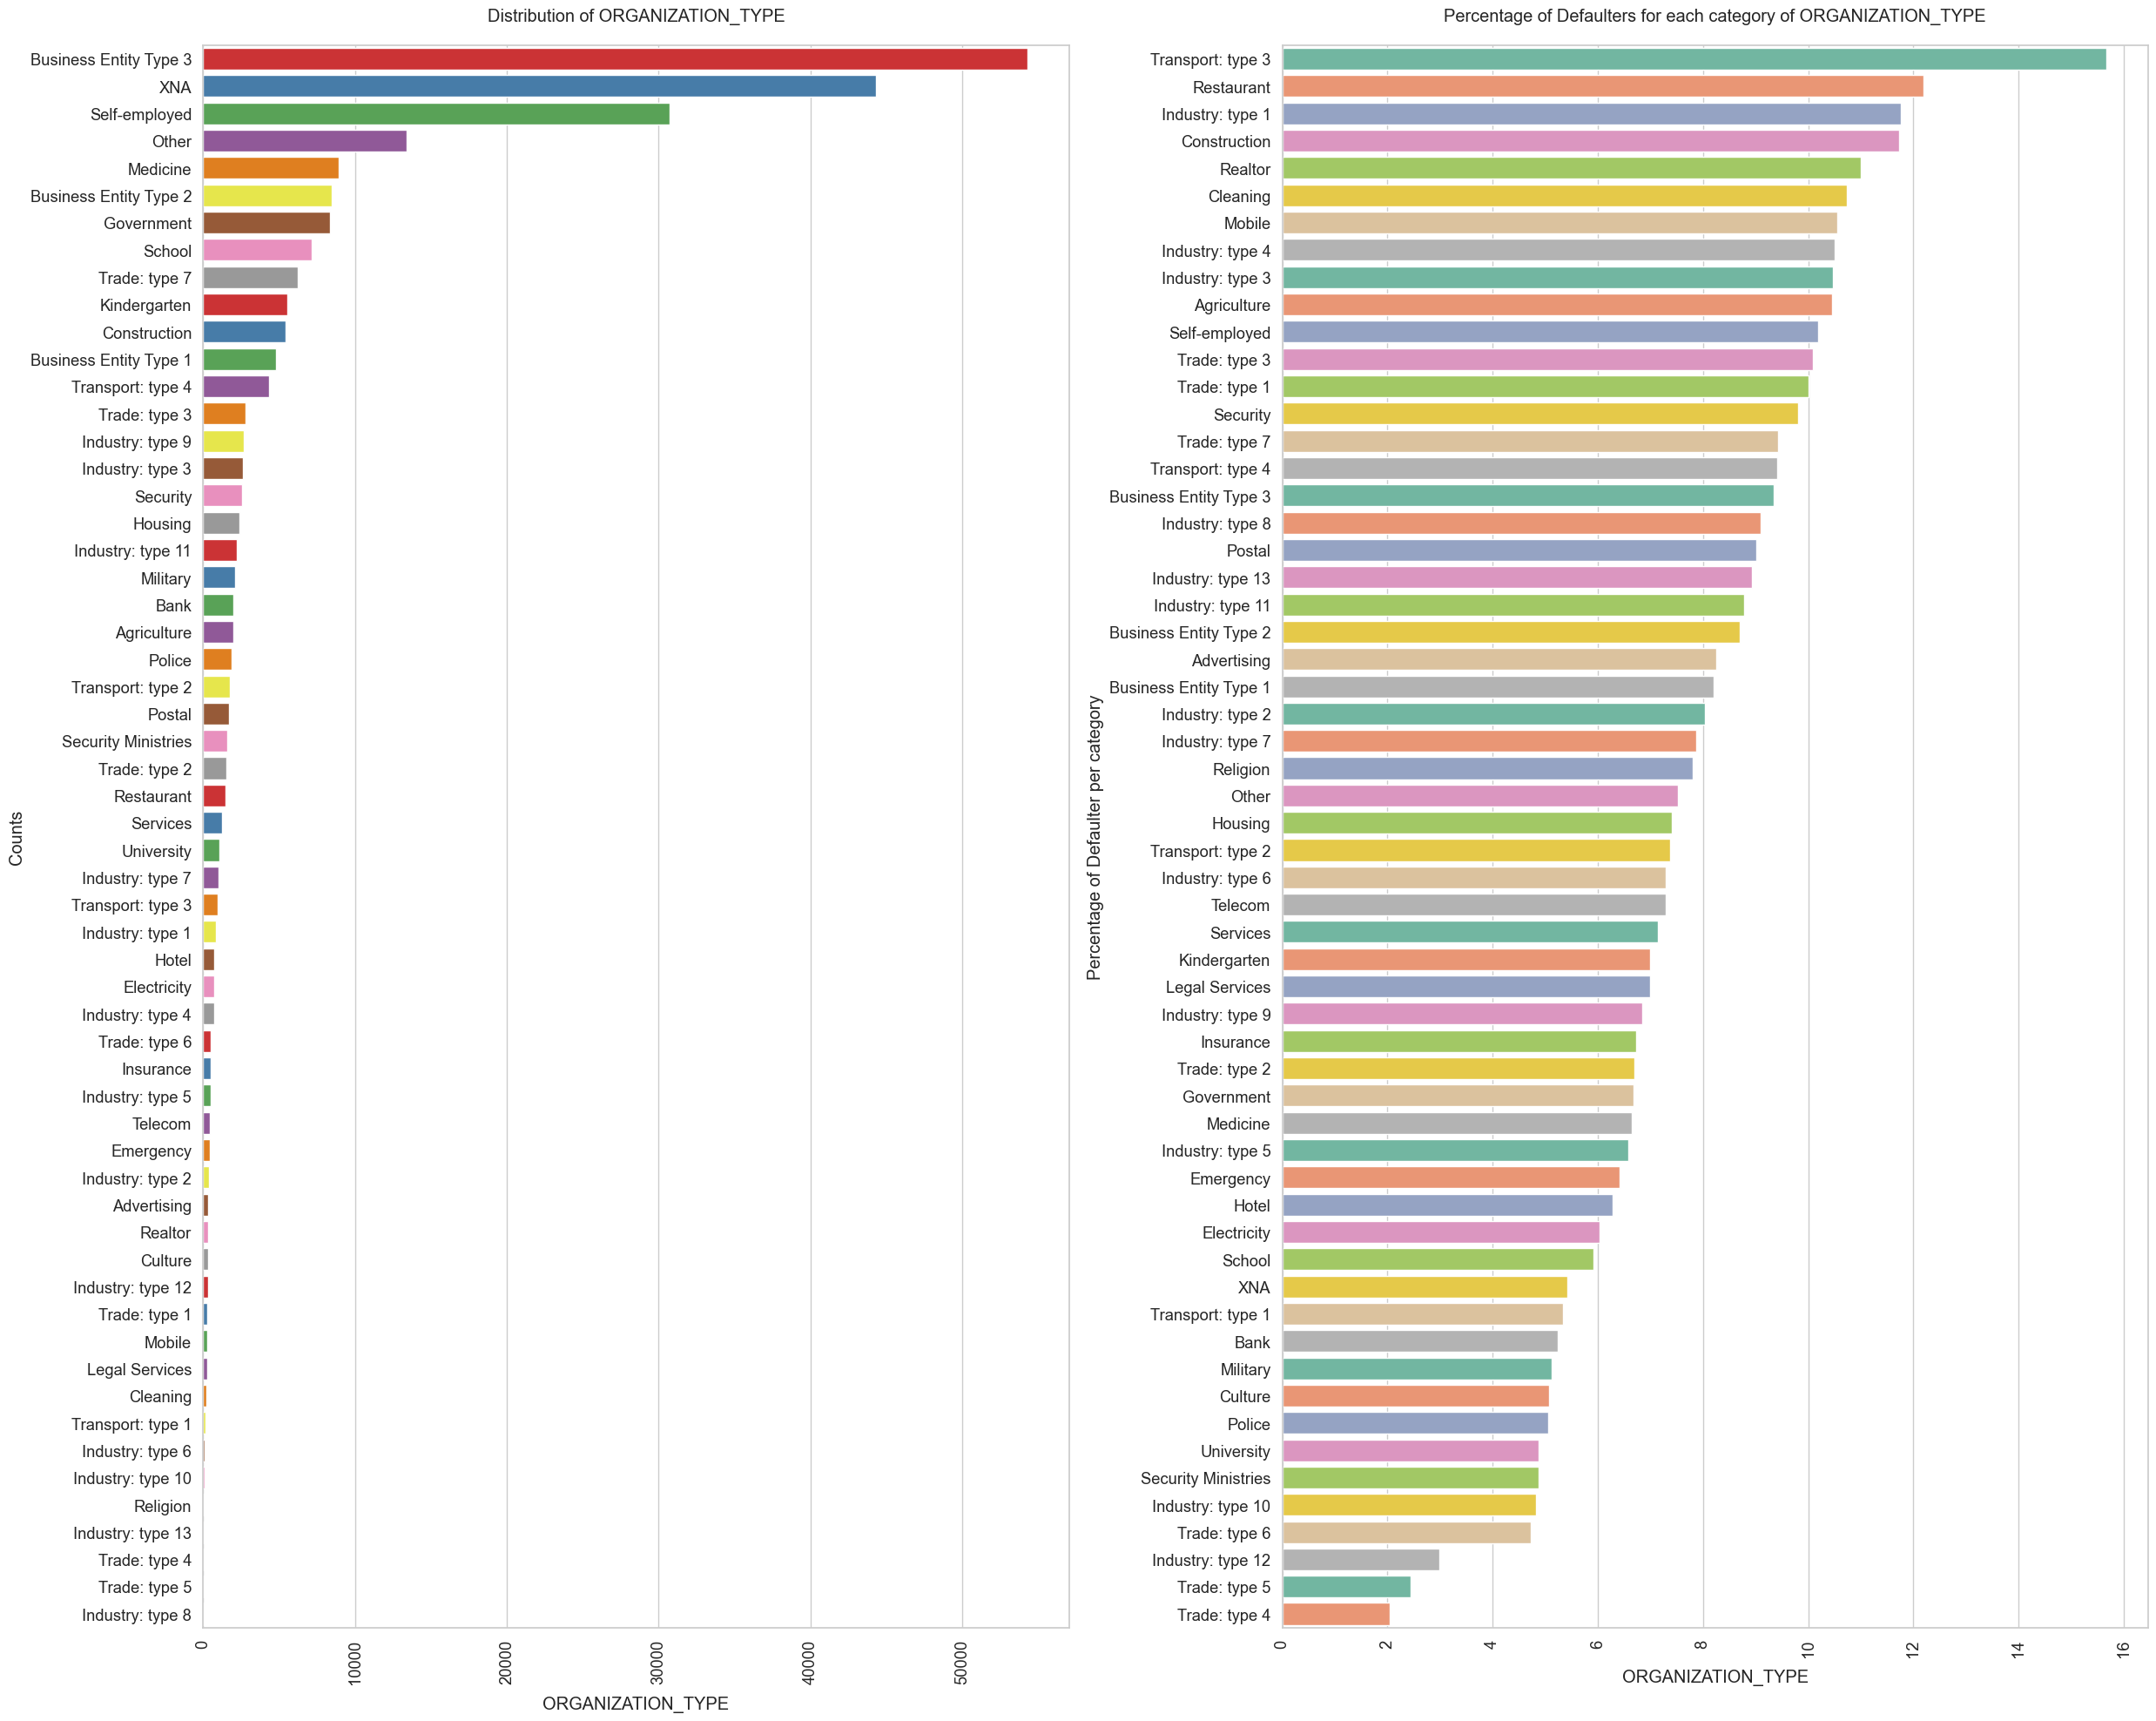

In [23]:
plot_categorical_variables_bar(app_train, 'ORGANIZATION_TYPE', figsize = (25,20), horizontal=True)

### Observation
- From the first plot we see that most of the applicants work in Organizations of Type 'Business Entity Type3', 'XNA' or 'Self Employed'.
- The Organization Type 'XNA' could probably denote unclassified Organization Type and this value can be replaced by np.nan
- From the second plot, we notice that the applicants belonging to 'Transport: type 3' have the highest defaulting tendency as compared to the rest. They are followed by organizations of types: 'Industry: type 13', 'Industry: type 8', 'Restaurant', 'Construction', etc.
- The organizations which show lowest default rates are 'Trade: type 4', 'Industry: type 12', etc.

## 9.3 NAME_INCOME_TYPE

Total Number of unique categories of NAME_INCOME_TYPE = 8


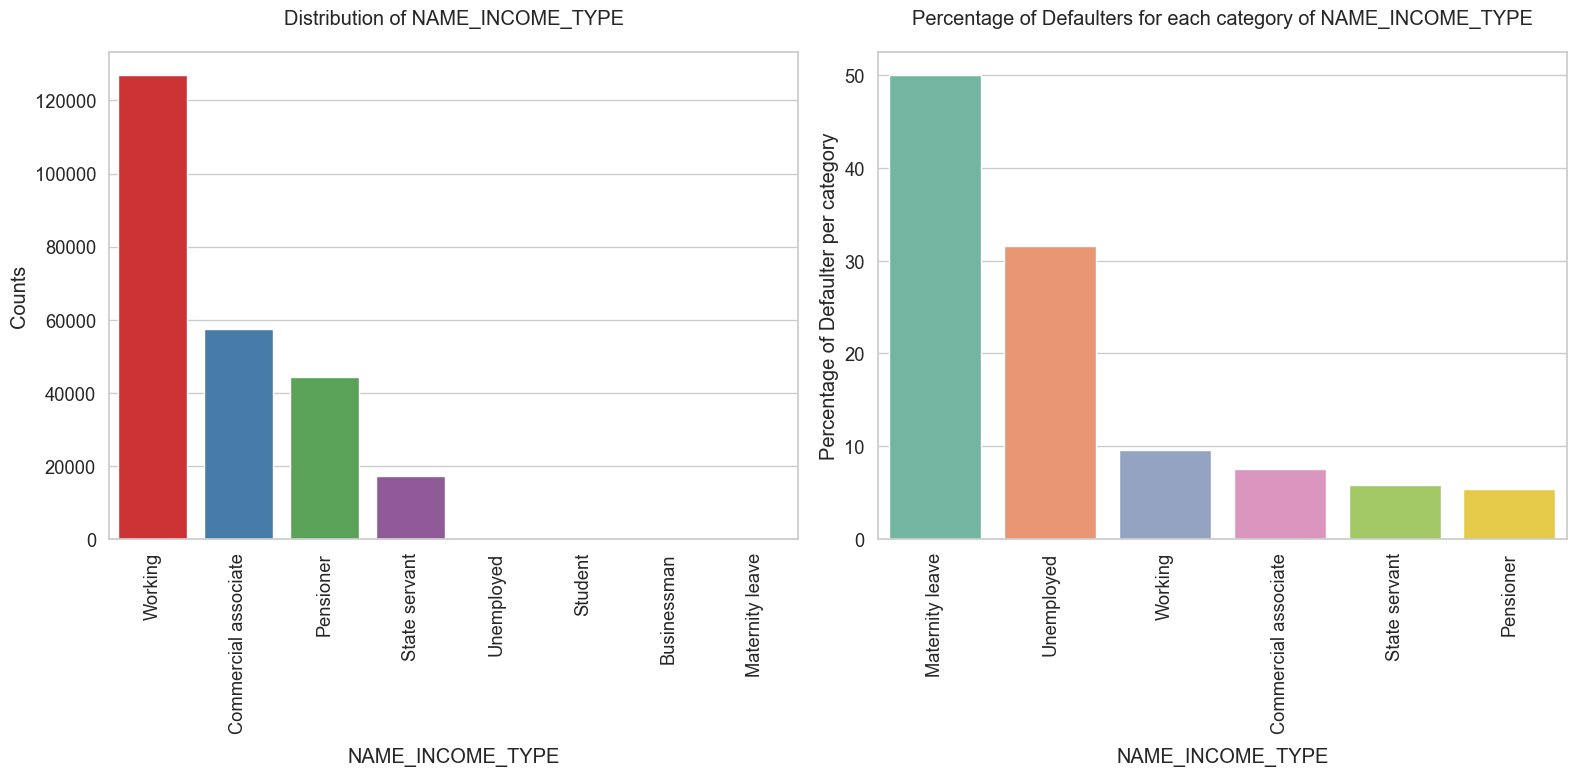

In [24]:
plot_categorical_variables_bar(app_train, 'NAME_INCOME_TYPE')

### Observation
- Most people earn money from working
- People having income from maternity leave or unemployed have the highest defaulting tendency.

## 9.4 REG_CITY_NOT_WORK_CITY  and LIVE_CITY_NOT_WORK_CITY

Total Number of unique categories of REG_CITY_NOT_WORK_CITY = 2


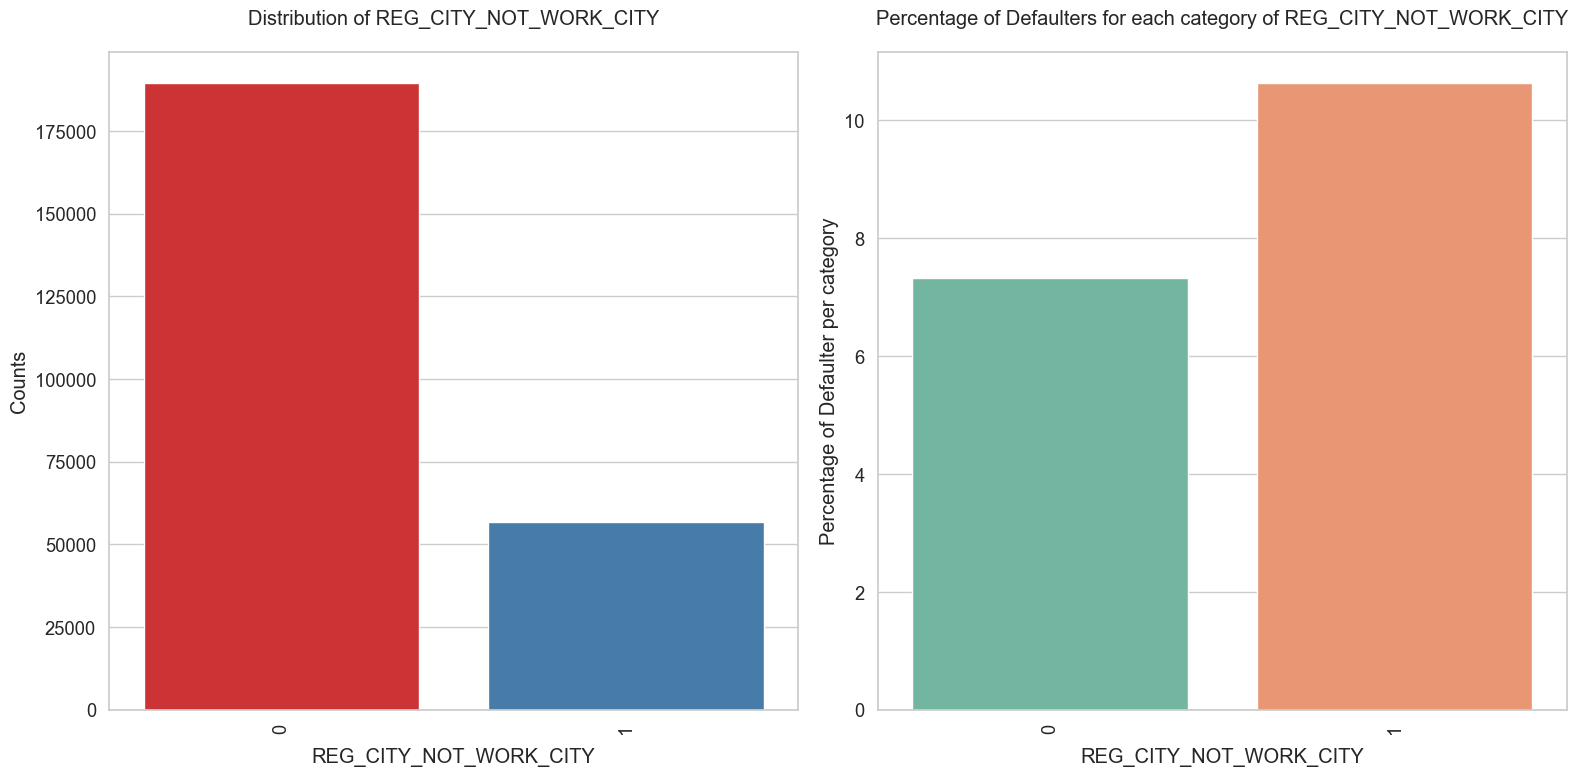

In [25]:
plot_categorical_variables_bar(app_train, 'REG_CITY_NOT_WORK_CITY')

Total Number of unique categories of LIVE_CITY_NOT_WORK_CITY = 2


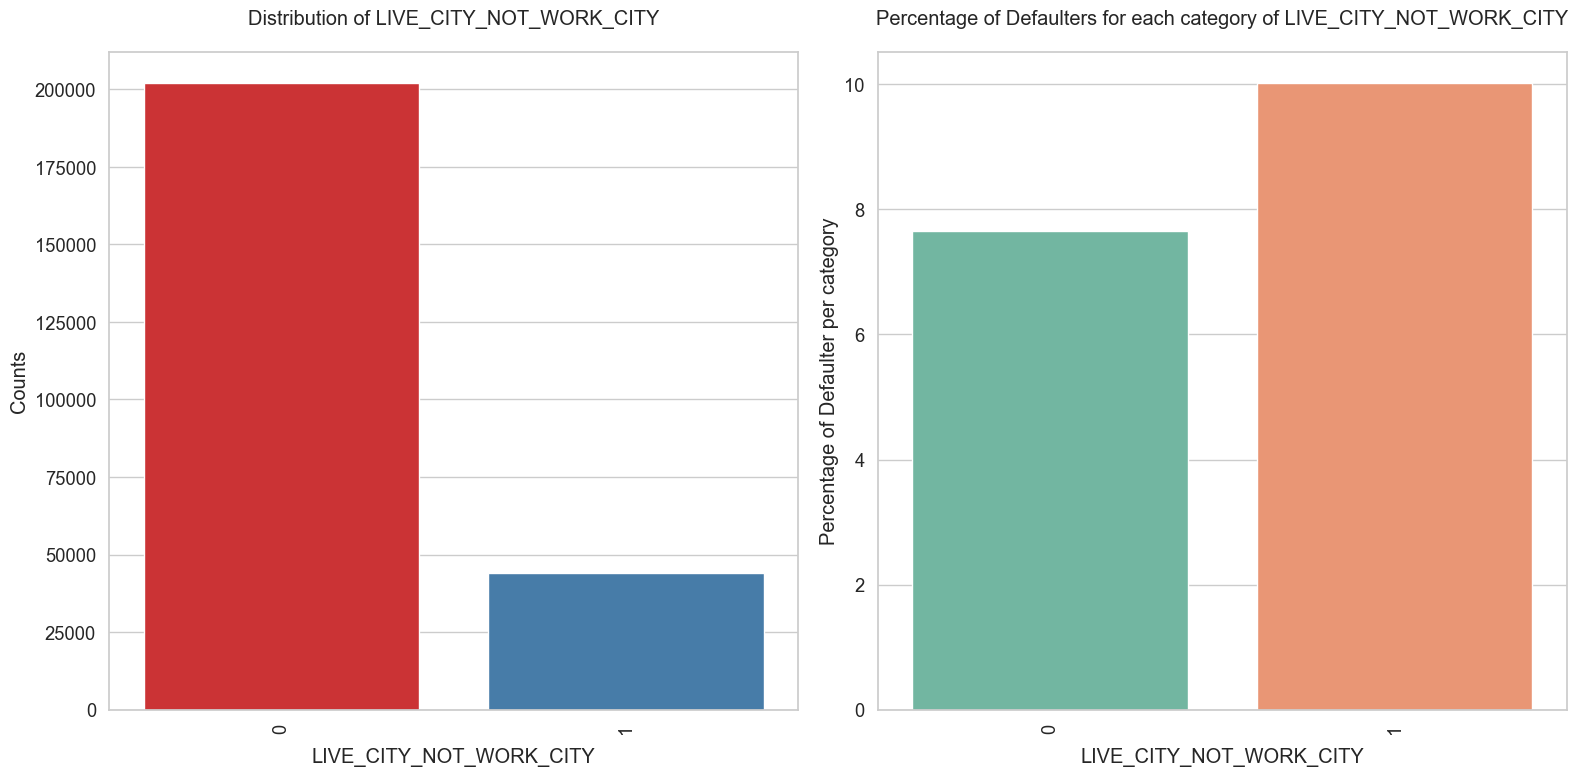

In [26]:
plot_categorical_variables_bar(app_train, 'LIVE_CITY_NOT_WORK_CITY')

### Observation
Most applicants have a matching address, but defaulters often have incorrect addresses that do not match their work address.

# 10. Numerical analysis

## 10.1 DAYS_BIRTH
For the given dataset, the age is given in Days, which can be harder to interpret. Thus, we will create a latent variable to store the ages in Years, which would be easier to analyze and interpret.

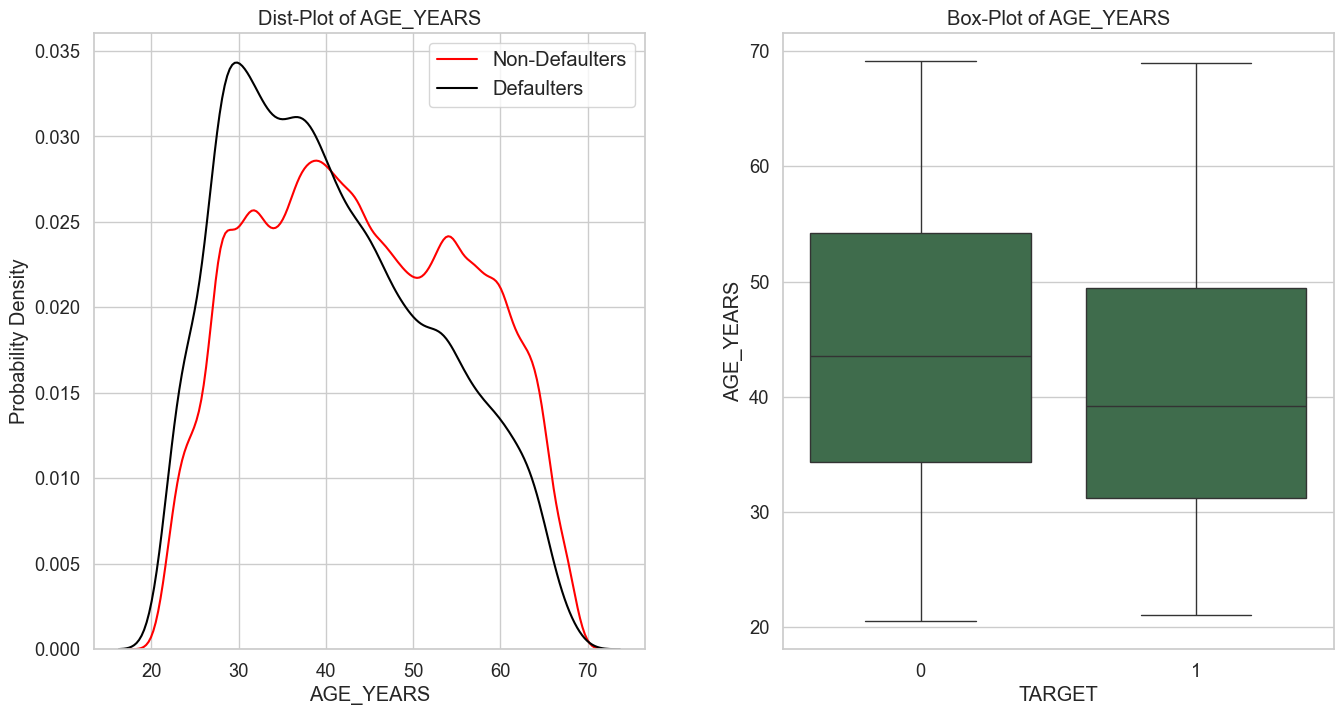

In [27]:
app_train['AGE_YEARS'] = app_train['DAYS_BIRTH'] / -365
plot_continuous_variables(app_train, 'AGE_YEARS', plots = ['distplot','box'])
app_train.drop('AGE_YEARS', axis=1, inplace=True)

### Observation
- The peak age of people who default is close to 30 years while at this point, the non-defaulters have a quite smaller PDF
- All the quantiles of ages of defaulters are less than non-defaulters

Thus, these observations imply that the defaulters are often younger than non-defaulters.


## 10.2 EXT_SOURCES

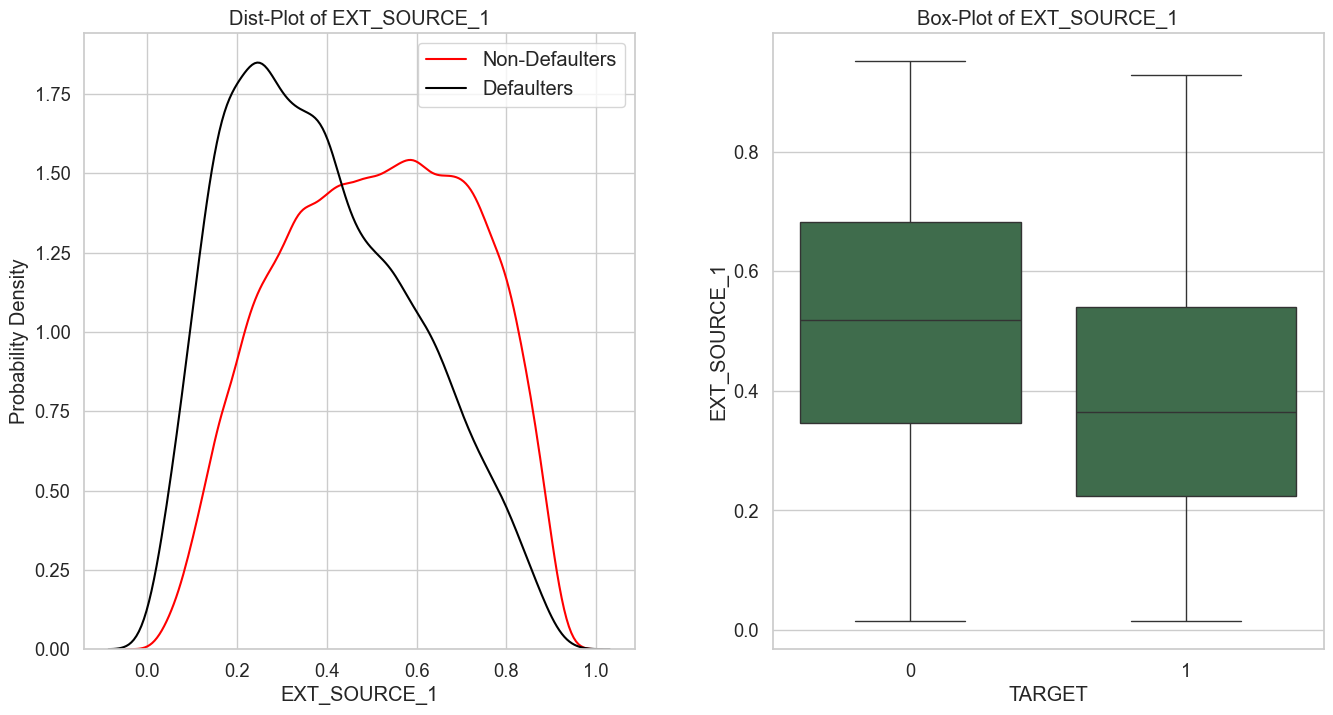

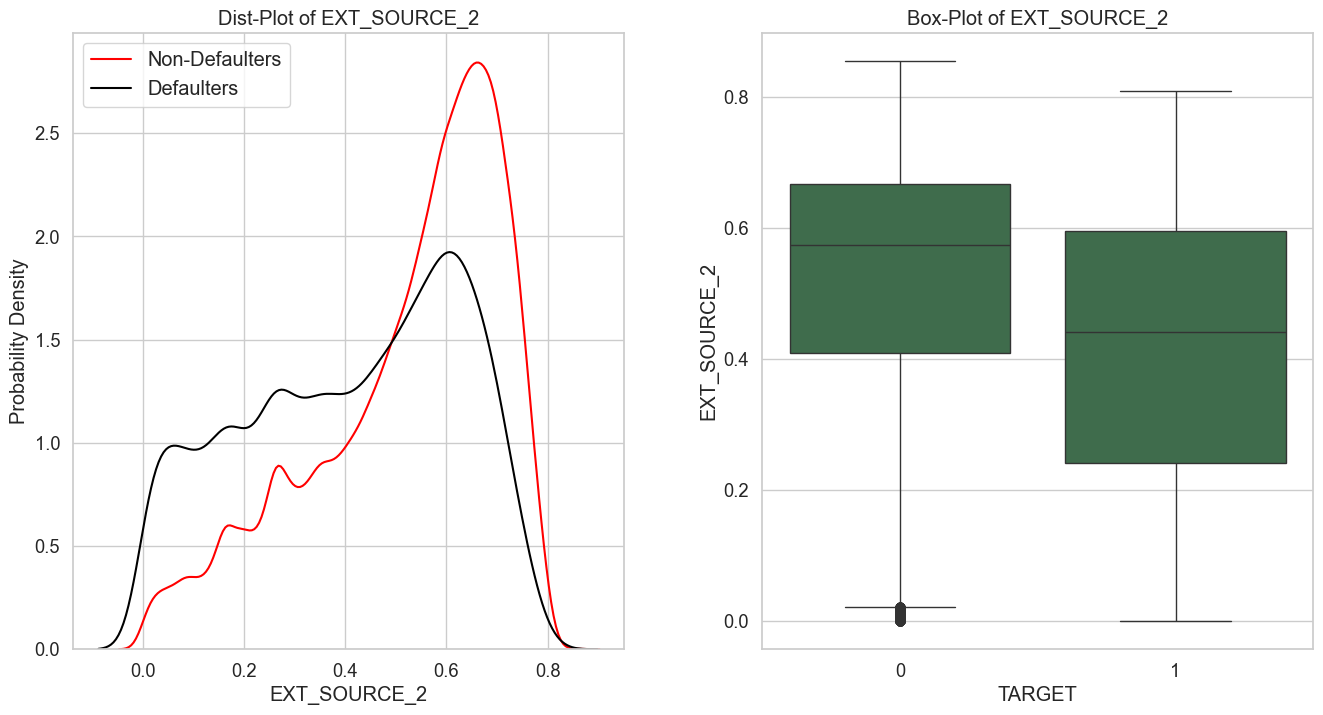

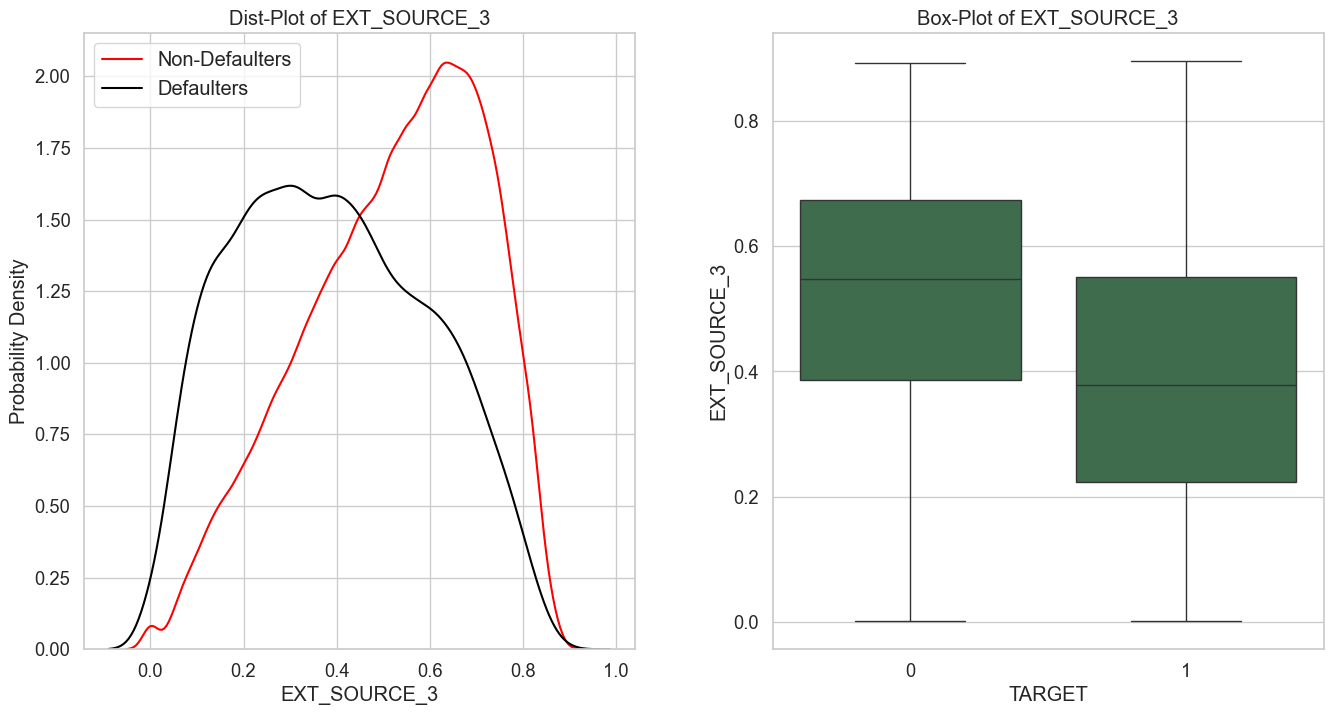

In [28]:
plot_continuous_variables(app_train, 'EXT_SOURCE_1', plots = ['distplot', 'box'])
plot_continuous_variables(app_train, 'EXT_SOURCE_2', plots = ['distplot', 'box'])
plot_continuous_variables(app_train, 'EXT_SOURCE_3', plots = ['distplot', 'box'])

### Observation
- Looking at the box-plots, it is evident that Defaulters tend to have significantly lower values for all three EXT_SOURCE columns. This trend is also evident in the Probability Density Functions (PDFs). Non-Defaulters show a higher peak at high EXT_SOURCE values, and the Probability Densities are very low for low values, indicating that Non-Defaulters generally have high values of these scores. 
- The median value for defaulters is almost equal to or lower than 25th percentile values of Non-Defaulters. Among all the features, EXT_SOURCE_1 and EXT_SOURCE_3 columns tend to show better discrimination/separability compared to EXT_SOURCE_2. 
- These three features appear to be the most effective in linearly separating Defaulters and Non-Defaulters among all the features explored so far.

## 10.3 DAYS_EMPLOYED_PCT

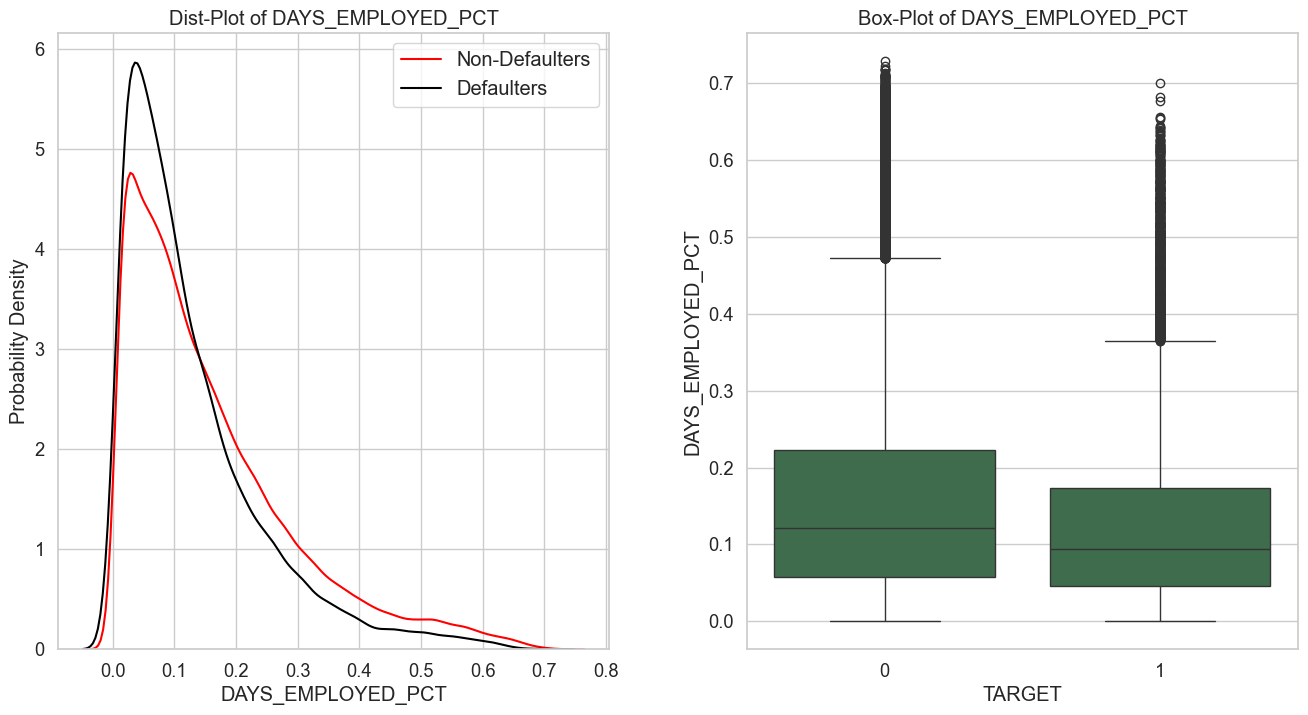

In [29]:
app_train['DAYS_EMPLOYED_PCT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
plot_continuous_variables(app_train, 'DAYS_EMPLOYED_PCT', plots = ['distplot','box'])
app_train.drop('DAYS_EMPLOYED_PCT', axis=1, inplace=True)

### Observation
Defaulters tend to have a lower employment duration

## 10.4 ANNUITY_INCOME_PCT

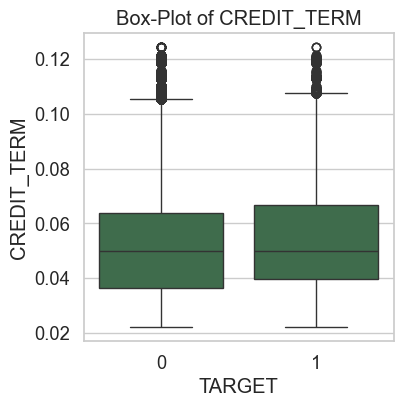

In [36]:
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
plot_continuous_variables(app_train, 'CREDIT_TERM', plots = ['box'], figsize=(4,4))
app_train.drop('CREDIT_TERM', axis=1, inplace=True)

### Observation
If it's a high percentage of available credit, the person is likely to pay off debts

## 10.5 CAR_TO_BIRTH_RATIO

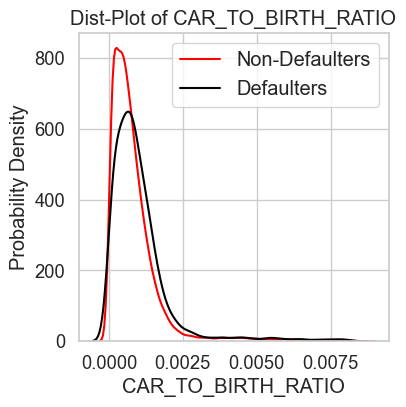

In [45]:
app_train['CAR_TO_BIRTH_RATIO'] = app_train['OWN_CAR_AGE'] / (-app_train['DAYS_BIRTH'])
plot_continuous_variables(app_train, 'CAR_TO_BIRTH_RATIO', plots = ['distplot'], figsize=(4,4))
app_train.drop('CAR_TO_BIRTH_RATIO', axis=1, inplace=True)

### Observation
A higher ratio may suggest greater financial stability and affluence, as it could indicate a higher income or better financial standing
